# IML Assignment 1

## Name: Yaroslava Bryukhanova


## Mail: y.bryukhanova@innopolis.university


## Group: AAI-02

### Code style policy 

We expect you to follow https://peps.python.org/pep-0008/ Python standart style and will reduce your points if you don't. Also we ask you to comment your code when it's needed (logical blocks, function declaration, loops), however over-documentation is the evil.

Example of nice code style (no need to run this cells):

In [4]:
# This function returns the sum of parameters
# @param my_param1 - here I explain what this parameter means
# @param my_param2 - here I explain what this parameter means
# @return - result of func if it's not void
def my_func(my_param1: int, my_param2: int)
    return my_param1 + my_param2

SyntaxError: expected ':' (3590760841.py, line 5)

There are few lines only, but they are represents important logical blocks, thus you should explain what their purpose:

In [ ]:
from my_training_package import my_regression, my_loader

# Data loading
x, y = my_loader.load("some.csv")

# Training
reg = my_regression()
reg.train(x,y)

# Evaluation on the same data set
y_pred = reg.evaluation(y)

Example of too detailed and meaningless commenting that is not welcome:

In [ ]:
# Import numpy package
import numpy as np
# This is variable x
x = 5
# This is variable y
y = 10
# Print x
print(x)

Ultimately, we belive in your programming common sense :) The purpose of clear code style is fast and smooth grading of your implementation and checking that you understand ML concepts.

## Task 1

### 3.1. Linear Regression
#### Data reading

In [92]:
import pandas as pd
import numpy as np

# Data loading
df = pd.read_csv("train_1.csv", index_col=0)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

#### Train\validation splitting

In [93]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### Linear regression model fitting

In [94]:
from sklearn.linear_model import LinearRegression

# Declare and train a linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Prediction by model on the validation set
y_pred_lr = linear_model.predict(X_test)

#### Linear regression model prediction & Evaluation


In [95]:
from sklearn import metrics

# Print MSE, RMSE, MAE and R2 score
# @param y_actual - actual values
# @param y_pred - predicted values
def print_metrics(y_actual, y_pred):
    print("MSE:", metrics.mean_squared_error(y_actual, y_pred))
    print("RMSE:", np.sqrt(metrics.mean_squared_error(y_actual, y_pred)))
    print("MAE:", metrics.mean_absolute_error(y_actual, y_pred))
    print("R2 score:", metrics.r2_score(y_actual, y_pred))

print_metrics(y_test, y_pred_lr)

MSE: 4981.420462673972
RMSE: 70.5791786766747
MAE: 59.68387524655596
R2 score: 0.8878644733172235


### 3. 2 Polynomial Regression
#### Constructing the polynomial regression pipeline

In [96]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

In [97]:
# Create a pipeline 
degree = 2
pipeline = make_pipeline(PolynomialFeatures(degree), LinearRegression())

#### Tuning the degree hyper-parameter using GridSearch

In [98]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Declare a GridSearch instance 
param_grid = {'polynomialfeatures__degree': range(2,6)}
search = GridSearchCV(pipeline, cv=8, scoring = 'neg_mean_squared_error', param_grid=param_grid)

# Train the GridSearch
search.fit(X_train, y_train)

# Find the optimum degrees
print(f"Best parameter: {search.best_params_}" )

# Print the GridSearchCV score
y_pred = search.predict(X_test)
print(f"search score: {-search.best_score_}")

Best parameter: {'polynomialfeatures__degree': 4}
search score: 0.4110580356483494


In [99]:
# Print the metrics
print_metrics(y_test, y_pred)

MSE: 0.23733371521454866
RMSE: 0.4871690827777853
MAE: 0.3600559957774291
R2 score: 0.9999946574393078


#### Save the model

In [100]:
import pickle 

# Save the GridSearch model for evaluation
filename = 'poly_optimized_model.sav'
pickle.dump(search, open(filename, 'wb'))

### 3.3 Determine the linear dependent features

Use the following code cell to determine a pair of features from the training dataset that are correlated to each other. Explain your choise in the markdown cell.

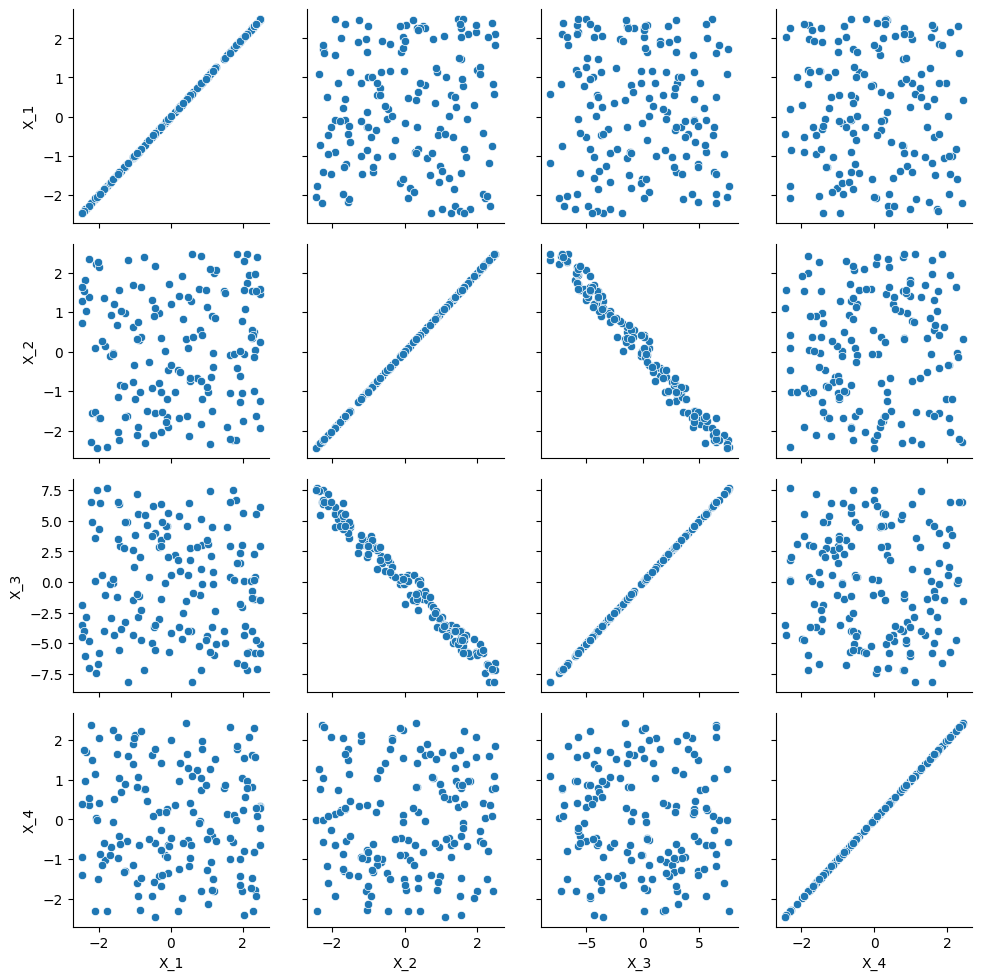

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot of the training set
g = sns.PairGrid(X_train)
g.map(sns.scatterplot)

plt.show()

x_2 and x_3 are the most correlated features. They have the highest correlation coefficient and the scatter plot shows a linear relationship between them

## Task 2

### 4.1 Data processing
#### Loading the dataset

In [102]:
import pandas as pd

#### Exploring the dataset  and removing 2 redundant features

In [103]:
df = pd.read_csv("pokemon_modified.csv")
df.info()

# classification and name are not useful for the model 
df = df.drop(['classification'], axis=1)
df = df.drop(['name'], axis=1)

X = df.drop(['is_legendary'], axis=1)
y = df['is_legendary']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   against_bug        801 non-null    float64
 1   against_dark       801 non-null    float64
 2   against_dragon     801 non-null    float64
 3   against_electric   801 non-null    float64
 4   against_fairy      801 non-null    float64
 5   against_fight      801 non-null    float64
 6   against_fire       801 non-null    float64
 7   against_flying     801 non-null    float64
 8   against_ghost      801 non-null    float64
 9   against_grass      801 non-null    float64
 10  against_ground     801 non-null    float64
 11  against_ice        801 non-null    float64
 12  against_normal     801 non-null    float64
 13  against_poison     801 non-null    float64
 14  against_psychic    801 non-null    float64
 15  against_rock       801 non-null    float64
 16  against_steel      801 non

#### Splitting the data
Use random_state = 123, stratify, and set test_size = 0.2

In [104]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

Check if the dataset is balanced or not and comment on it

In [105]:
# The dataset is imbalanced because the number of non-legendary pokemons is much higher than the number of legendary pokemons
class_counts = df['is_legendary'].value_counts()
print(class_counts)

is_legendary
0    731
1     70
Name: count, dtype: int64


#### Checking for missing values

In [106]:
missing_values_train = X_train.isnull().sum()
missing_values_test = X_test.isnull().sum()
print(missing_values_train, missing_values_test)

against_bug           0
against_dark          0
against_dragon        0
against_electric      0
against_fairy         0
against_fight         0
against_fire          0
against_flying        0
against_ghost         0
against_grass         0
against_ground        0
against_ice           0
against_normal        0
against_poison        0
against_psychic       0
against_rock          0
against_steel         0
against_water         0
attack                0
base_egg_steps        0
base_happiness        0
base_total            0
capture_rate          0
defense               0
experience_growth     0
height_m             14
hp                    0
percentage_male      72
type1                 0
sp_attack             0
sp_defense            0
speed                 0
weight_kg            14
generation            0
dtype: int64 against_bug           0
against_dark          0
against_dragon        0
against_electric      0
against_fairy         0
against_fight         0
against_fire          0
aga

#### Impute the missing values

In [107]:
from sklearn.impute import SimpleImputer

# Define a SimpleImputer instance
imputer = SimpleImputer(strategy='most_frequent')

# Apply the imputer
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)    


#### Double check that there are no missing values

In [108]:
missing_values_train = X_train.isnull().sum()
missing_values_test = X_test.isnull().sum()
print(missing_values_train, missing_values_test)

against_bug          0
against_dark         0
against_dragon       0
against_electric     0
against_fairy        0
against_fight        0
against_fire         0
against_flying       0
against_ghost        0
against_grass        0
against_ground       0
against_ice          0
against_normal       0
against_poison       0
against_psychic      0
against_rock         0
against_steel        0
against_water        0
attack               0
base_egg_steps       0
base_happiness       0
base_total           0
capture_rate         0
defense              0
experience_growth    0
height_m             0
hp                   0
percentage_male      0
type1                0
sp_attack            0
sp_defense           0
speed                0
weight_kg            0
generation           0
dtype: int64 against_bug          0
against_dark         0
against_dragon       0
against_electric     0
against_fairy        0
against_fight        0
against_fire         0
against_flying       0
against_ghost        

#### Encode categorically

In [109]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encoding of the type1 column
encoder = OneHotEncoder()

# Apply the encoder
onehot_train = encoder.fit_transform(X_train[['type1']])
X_train['type1'] = onehot_train.toarray()

onehot_test = encoder.transform(X_test[['type1']])
X_test['type1'] = onehot_test.toarray()


#### Scale the data

In [110]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

# Define a scaler instance from one of the above
scaler = StandardScaler()

# Apply the scaler on both train and test features
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

#### <span style="color:red">Correlation matrix</span>

Are there highly co-related features in the dataset? Is it a problem? Explain in the markdown cell.

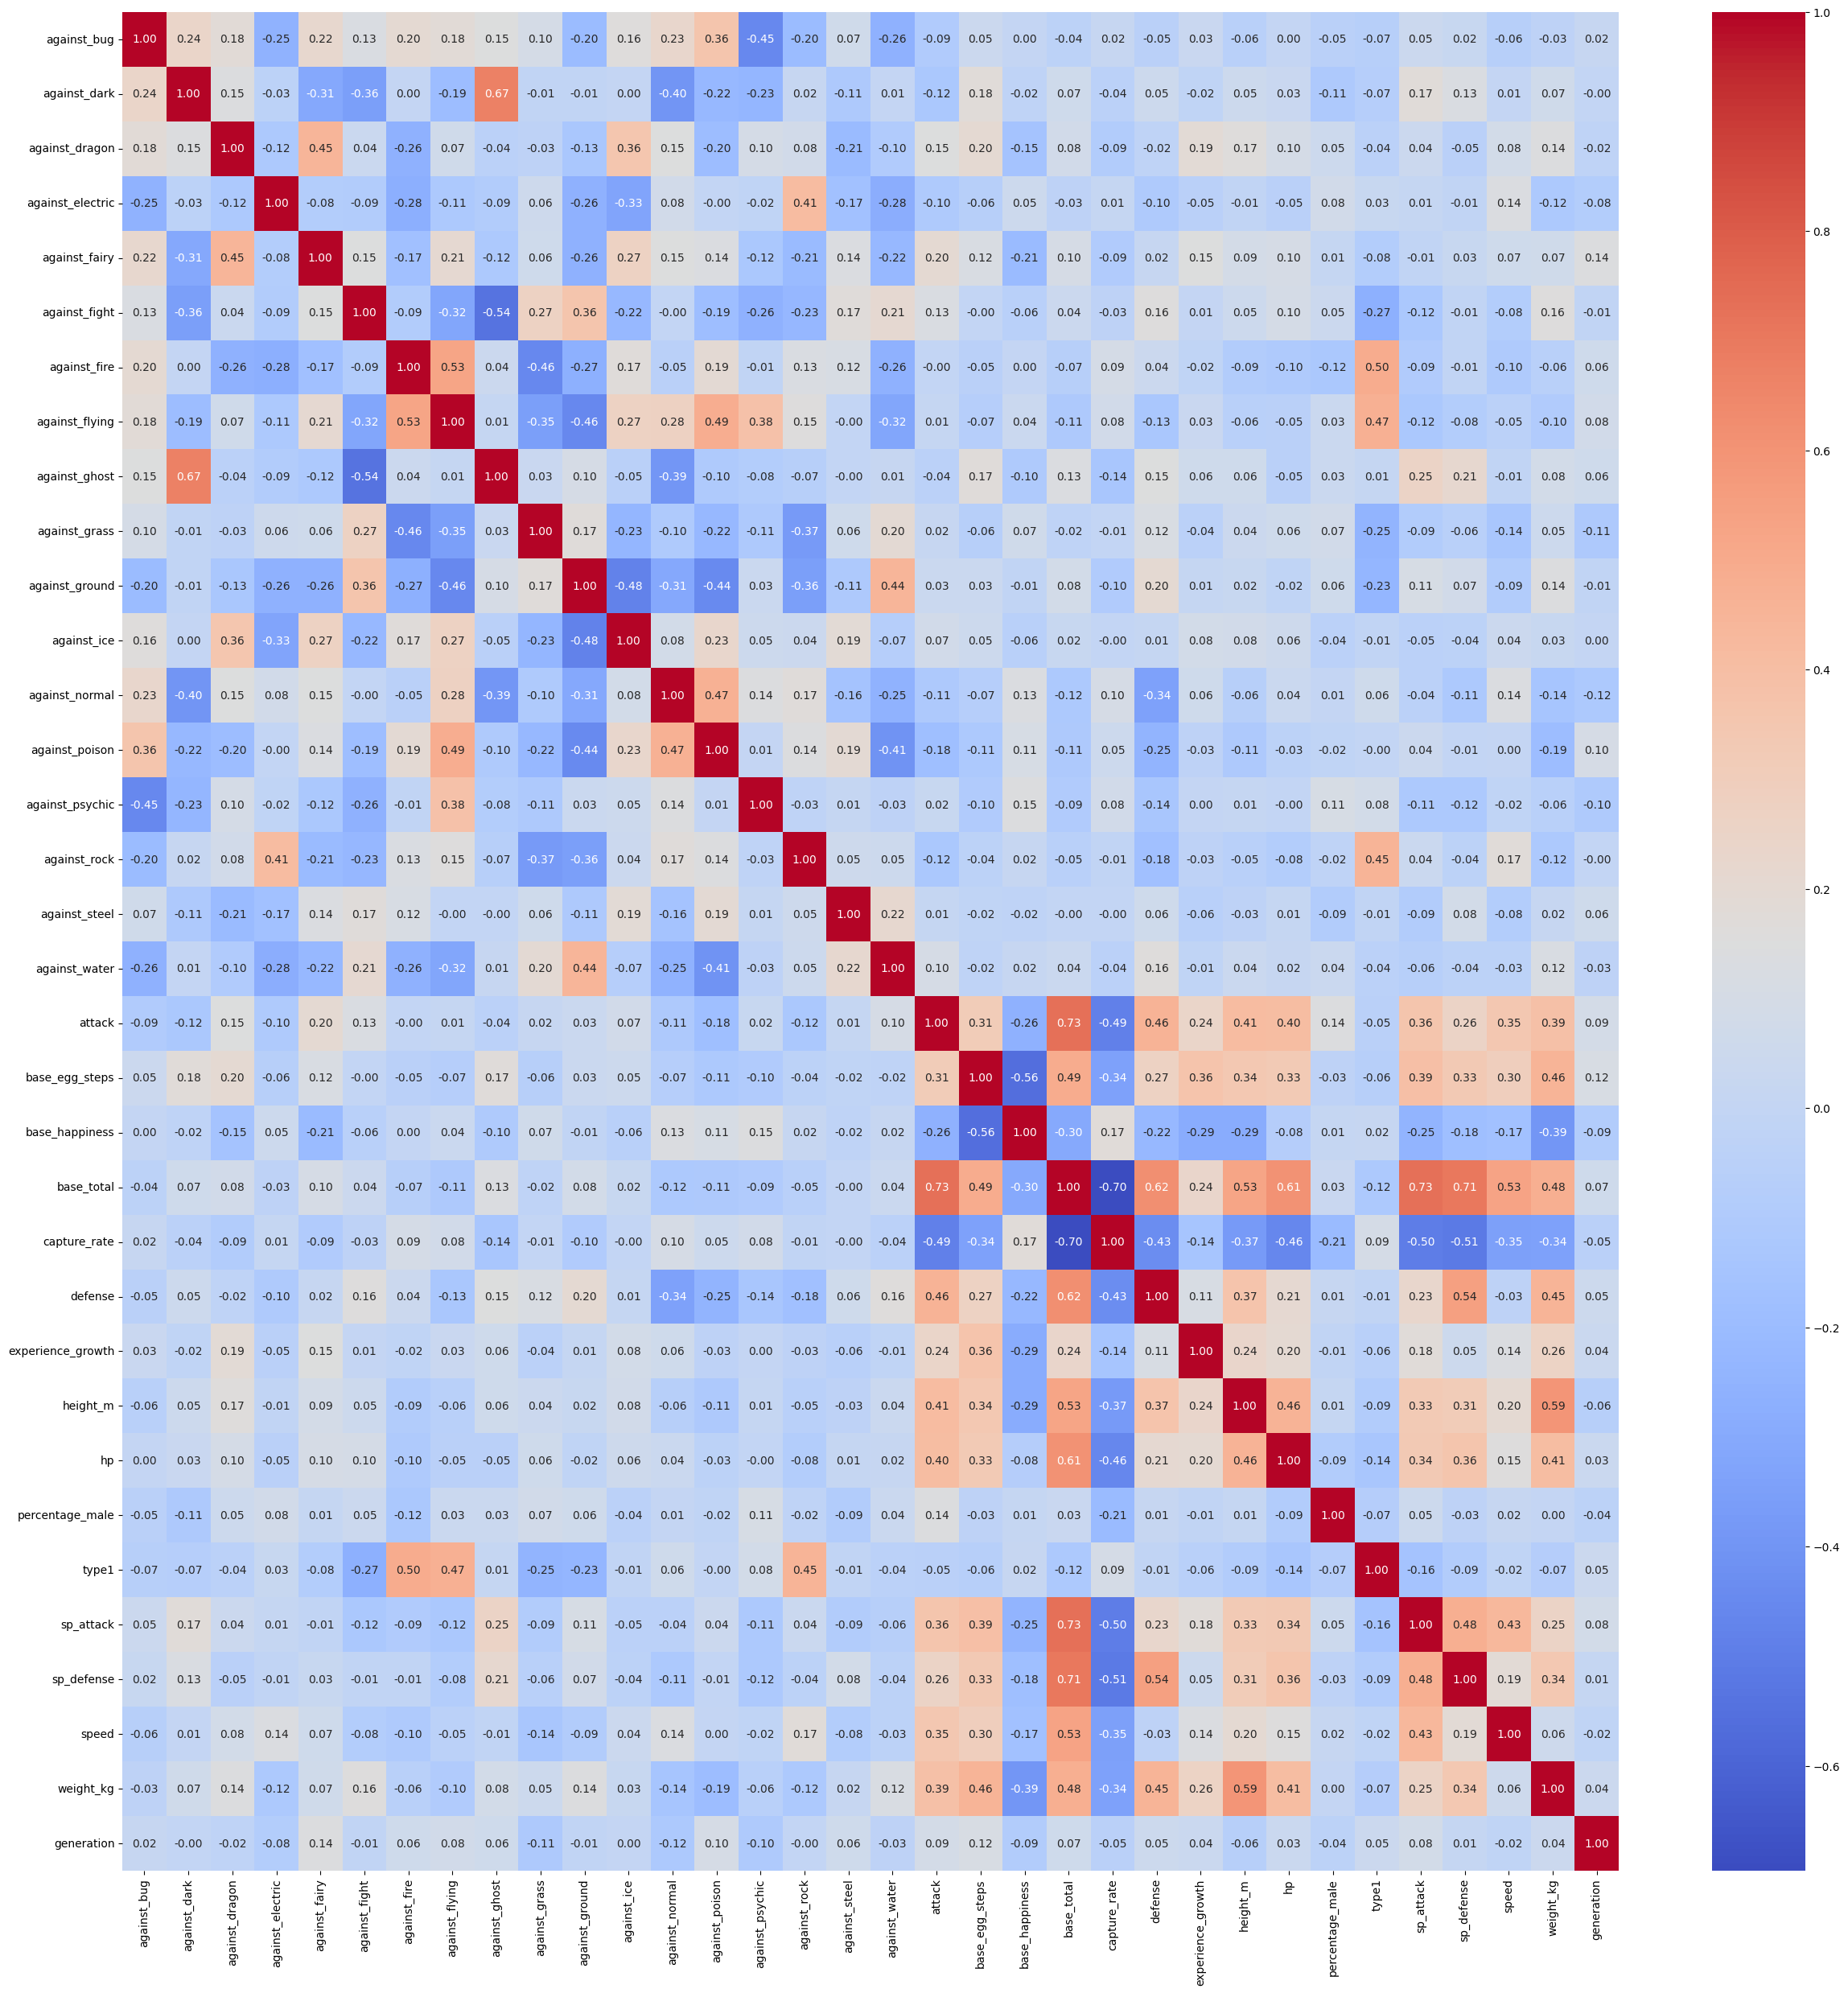

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 30))

# Plot the correlation matrix
corr_matrix = X_train.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

The correlation matrix shows that the features are not highly correlated with each other. Attack and base_total are the most correlated features. It is not a problem for the model because the correlation is not very high.

### 4.2 Model fitting and Comparison

#### Tuning LR model

In [112]:
# Caclulate and print classification metrics: accuracy, precision, recall, and F1 score 
# @param y_actual - actual values
# @param y_pred - predicted values
def print_clf_metrics(y_actual, y_pred ):
    print("Accuracy:", metrics.accuracy_score(y_actual, y_pred))
    print("Precision:", metrics.precision_score(y_actual, y_pred))
    print("Recall:", metrics.recall_score(y_actual, y_pred))
    print("F1 score:", metrics.f1_score(y_actual, y_pred))

In [113]:
# Specify GridSearchCV as in intruction
parameters = [{'penalty': ['l2'], 'C': np.logspace(-3,3,7), 'solver': ['newton-cg', 'lbfgs', 'liblinear']},
              {'penalty': ['l1'], 'C': np.logspace(-3,3,7), 'solver': ['liblinear']},]

In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

# Declare and train logistic regression inside GridSearchCV with the parameters above
# Set max_iter=1000 in LR constructor
lr_clf_gs = GridSearchCV(LogisticRegression(max_iter=1000), parameters, scoring='f1', cv=5)
lr_clf_gs.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid=[{'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                          'penalty': ['l2'],
                          'solver': ['newton-cg', 'lbfgs', 'liblinear']},
                         {'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                          'penalty': ['l1'], 'solver': ['liblinear']}],
             scoring='f1')

In [115]:
print("Tuned Hyperparameters: ", lr_clf_gs.best_params_)
print("Accuracy :", lr_clf_gs.best_score_)

Tuned Hyperparameters:  {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy : 0.9320698980653214


#### Construct a LR with the best params and Evaluate the LR with the best params

In [116]:
lr_clf = lr_clf_gs.best_estimator_
lr_y_pred = lr_clf.fit(X_train, y_train).predict(X_test)

In [117]:
print_clf_metrics(y_test, lr_y_pred)

Accuracy: 0.9813664596273292
Precision: 0.8888888888888888
Recall: 0.9411764705882353
F1 score: 0.9142857142857143


#### Print the top 5 most influencing features and the top 5 ignored features

In [118]:
feature_names = X_train.columns
coef_series = pd.Series(lr_clf.coef_[0], index=feature_names)

# Get top 5 most influencing features
print("Top 5 most influencing features: ")
print(coef_series.nlargest(5))

# Get top 5 ignored features
print("Top 5 ignored features: ")
print(coef_series.nsmallest(5))

Top 5 most influencing features: 
base_egg_steps       1.949793
base_total           1.188942
experience_growth    0.928198
speed                0.545142
base_happiness       0.383716
dtype: float64
Top 5 ignored features: 
capture_rate      -0.928298
against_dragon    -0.634409
against_fight     -0.267473
height_m          -0.250223
percentage_male   -0.143855
dtype: float64


#### Tuning KNN model

In [119]:
from sklearn.neighbors import KNeighborsClassifier

# Declare and train knn inside GridSearchCV
param_grid = {'n_neighbors': list(range(1, 15)), 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan', 'chebyshev', 'cosine']}
knn_clf_gs = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='f1')
knn_clf_gs.fit(X_train, y_train)

print("Tuned Hyperparameters :", knn_clf_gs.best_params_)
print("Accuracy :", knn_clf_gs.best_score_)

Tuned Hyperparameters : {'metric': 'cosine', 'n_neighbors': 4, 'weights': 'distance'}
Accuracy : 0.8888023088023088


#### Construct a KNN model with the best params and Evaluate the KNN with the best params


In [120]:
knn_clf = knn_clf_gs.best_estimator_
knn_y_pred = knn_clf.fit(X_train, y_train).predict(X_test)

print_clf_metrics(y_test, knn_y_pred)

Accuracy: 0.9751552795031055
Precision: 0.8823529411764706
Recall: 0.8823529411764706
F1 score: 0.8823529411764706


#### Fitting GNB to the data and evaluating on the test dataset

In [121]:
from sklearn.naive_bayes import GaussianNB

# Declare and train GaussianNB. No hyperparameters tuning 
gauss_nb_clf = GaussianNB()
gauss_y_pred = gauss_nb_clf.fit(X_train, y_train).predict(X_test)

print_clf_metrics(y_test, gauss_y_pred)

Accuracy: 0.9627329192546584
Precision: 0.7619047619047619
Recall: 0.9411764705882353
F1 score: 0.8421052631578947


#### Which metric is most appropriate for this task and why?

#### Compare the 3 classifiers in terms of accuracy, precision, recall and F1-score.
What is the best model for this task? Explain

In [122]:
# TODO Write your code here
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming 'clf1', 'clf2', and 'clf3' are your classifiers, and 'X_test' and 'y_test' are your test data
print("Logistic Regression:")
print_clf_metrics(y_test, lr_y_pred)

print("KNN:")
print_clf_metrics(y_test, knn_y_pred)

print("GaussianNB:")
print_clf_metrics(y_test, gauss_y_pred)

Logistic Regression:
Accuracy: 0.9813664596273292
Precision: 0.8888888888888888
Recall: 0.9411764705882353
F1 score: 0.9142857142857143
KNN:
Accuracy: 0.9751552795031055
Precision: 0.8823529411764706
Recall: 0.8823529411764706
F1 score: 0.8823529411764706
GaussianNB:
Accuracy: 0.9627329192546584
Precision: 0.7619047619047619
Recall: 0.9411764705882353
F1 score: 0.8421052631578947


Logistic regression is the best model for this dataset because it has the highest accuracy and F1 score

## 5. Bonus Task

#### Loading the Dataset

In [ ]:
import pandas as pd

# Load the data
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_data.drop('target', axis=1), test_data.drop('target', axis=1), train_data['target'], test_data['target']
print(X_train, y_train, X_test, y_test)

####  Plot the data using the pairplot in sns

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# TODO Write your code here

#### Fit LR to the training dataset using OVR and evaluate on the test dataset

In [ ]:
# TODO Write your code here
ovr_lr = ...

#### Fit LR to the training dataset using multinomial and evaluate on the test dataset


In [ ]:
# TODO Write your code here
multi_lr = ...

#### Using gridsearch to tune the C value and multi class

In [ ]:
# TODO Write your code here
params = ...
grid_search_clf = ...

In [ ]:
print("Tuned Hyperparameters :")
print("Accuracy :")

#### Comment on why one multi_class technique was better than the other

#### Create LR with the best params

In [ ]:
# TODO Write your code here
multi_lr = ... 

#### Visualize the decision boundaries

In [ ]:
from mlxtend.plotting import plot_decision_regions
# TODO Write your code here
multi_lr = ...

plot_decision_regions()

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression decision boundary)
plt.show()

#### Comment on the decision boundary, do you think this is a good model or not? and based on what?